In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df1=pd.read_csv('/content/drive/MyDrive/Olist/Tablas/Tabla1FinalCorrejida.csv' , sep=';')

In [3]:
df1=df1.drop(columns=['Estados','order_id','customer_id','order_item_id','product_id','seller_id','freight_value','customer_unique_id','customer_zip_code_prefix','customer_city'])
df1

,order_purchase_timestamp,price,product_category_name
0,2017-08-03 10:39:39,199.00,telephony
1,2017-05-13 13:16:20,16.90,NaN
2,2017-07-06 17:11:14,300.00,luggage_accessories
3,2017-12-23 16:45:12,239.00,electronics
4,2017-07-17 18:19:50,56.99,perfumery
...,...,...,...
110111,2017-02-28 12:39:01,120.99,sports_leisure
110112,2018-03-09 11:50:45,52.99,perfumery
110113,2018-01-18 11:52:59,145.99,auto
110114,2018-04-16 20:51:56,21.99,telephony


In [4]:
df1['order_purchase_timestamp']=pd.to_datetime(df1['order_purchase_timestamp'])

In [5]:
df1['fecha']= df1['order_purchase_timestamp'].dt.date
df1

,order_purchase_timestamp,price,product_category_name,fecha
0,2017-08-03 10:39:39,199.00,telephony,2017-08-03
1,2017-05-13 13:16:20,16.90,NaN,2017-05-13
2,2017-07-06 17:11:14,300.00,luggage_accessories,2017-07-06
3,2017-12-23 16:45:12,239.00,electronics,2017-12-23
4,2017-07-17 18:19:50,56.99,perfumery,2017-07-17
...,...,...,...,...
110111,2017-02-28 12:39:01,120.99,sports_leisure,2017-02-28
110112,2018-03-09 11:50:45,52.99,perfumery,2018-03-09
110113,2018-01-18 11:52:59,145.99,auto,2018-01-18
110114,2018-04-16 20:51:56,21.99,telephony,2018-04-16


Hacemos los calculos sobre la categoria con mas ventas

In [6]:
dfHB=df1[df1['product_category_name']=='health_beauty']
dfHB

,order_purchase_timestamp,price,product_category_name,fecha
5,2017-04-05 00:11:11,249.99,health_beauty,2017-04-05
11,2017-05-27 04:22:55,12.90,health_beauty,2017-05-27
16,2018-08-10 23:54:45,159.00,health_beauty,2018-08-10
26,2018-07-29 21:05:16,527.90,health_beauty,2018-07-29
34,2017-02-24 14:00:07,184.90,health_beauty,2017-02-24
...,...,...,...,...
110073,2018-06-28 15:31:49,40.16,health_beauty,2018-06-28
110075,2017-10-09 10:19:14,84.99,health_beauty,2017-10-09
110083,2017-11-22 16:48:43,160.00,health_beauty,2017-11-22
110084,2017-11-22 16:48:43,160.00,health_beauty,2017-11-22


In [7]:
dfHB['fecha']=pd.to_datetime(dfHB['fecha'])
dfHB=dfHB.groupby('fecha')['price'].sum().reset_index()
dfHB

<ipython-input-7-cdd940202dac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHB['fecha']=pd.to_datetime(dfHB['fecha'])


,fecha,price
0,2016-09-15,134.97
1,2016-10-04,741.10
2,2016-10-05,121.84
3,2016-10-06,370.67
4,2016-10-07,467.66
...,...,...
597,2018-08-25,2138.15
598,2018-08-26,2863.32
599,2018-08-27,661.50
600,2018-08-28,469.80


In [8]:
dfHB.set_index('fecha', inplace=True)
dfHB

,price
fecha,
2016-09-15,134.97
2016-10-04,741.10
2016-10-05,121.84
2016-10-06,370.67
2016-10-07,467.66
...,...
2018-08-25,2138.15
2018-08-26,2863.32
2018-08-27,661.50


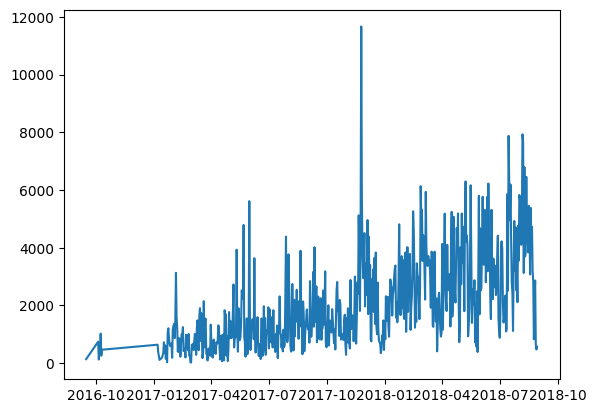

In [9]:
plt.plot(dfHB.index, dfHB.price)
plt.show()

voy a seguir con la agrupacion por dias

In [10]:
len(dfHB)

602

In [11]:
registros_nulos = dfHB[dfHB.isnull().any(axis=1)]

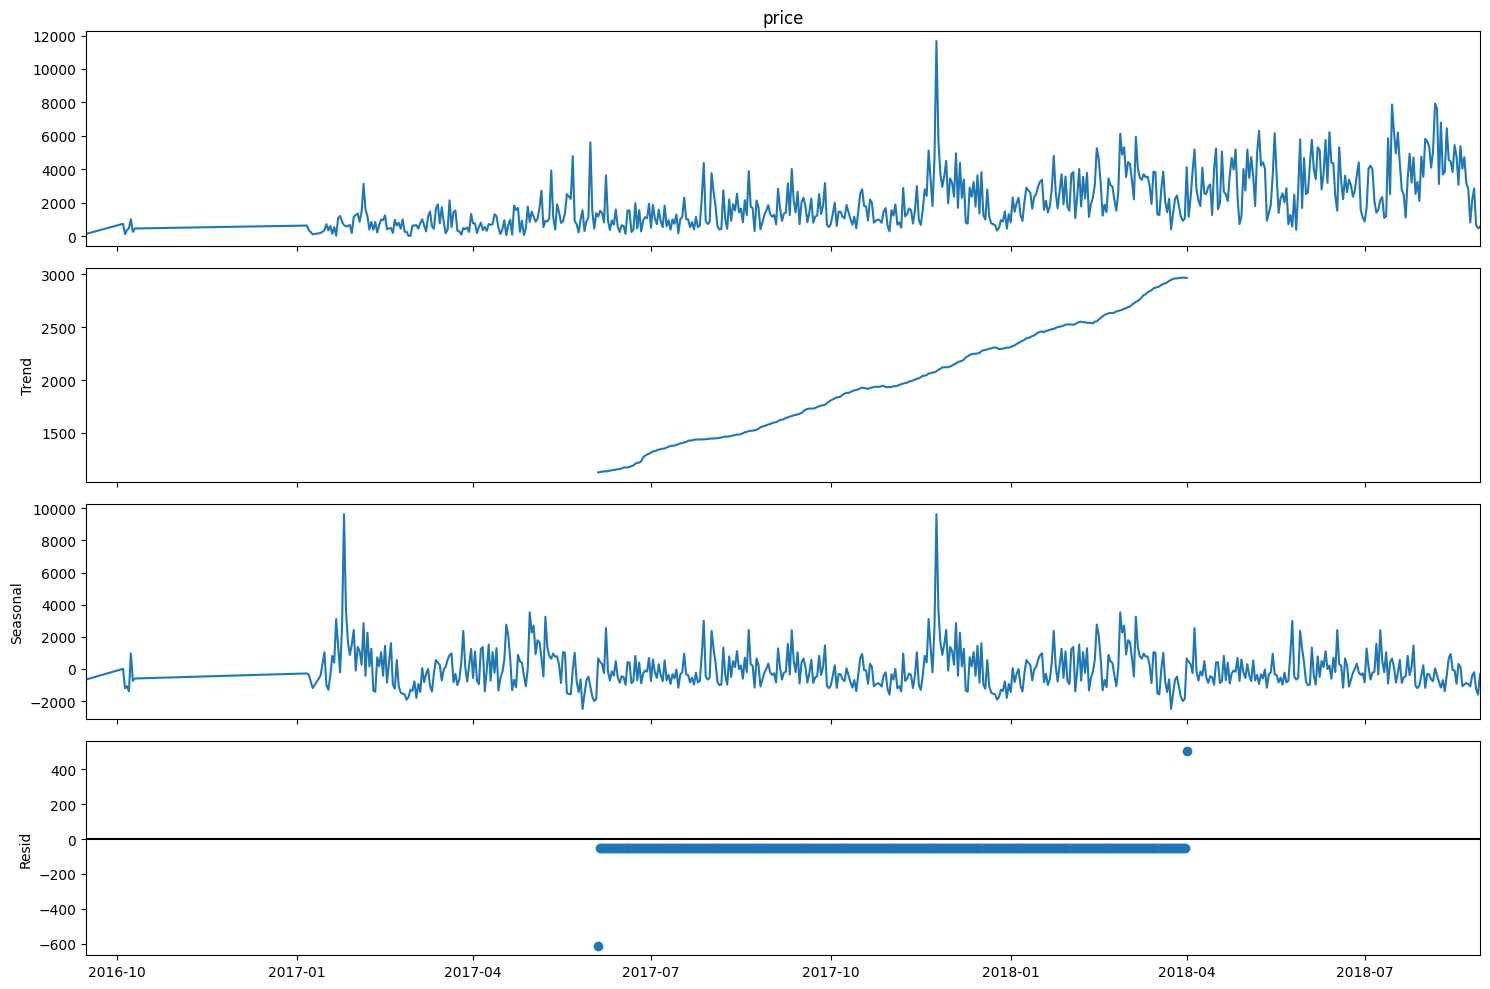

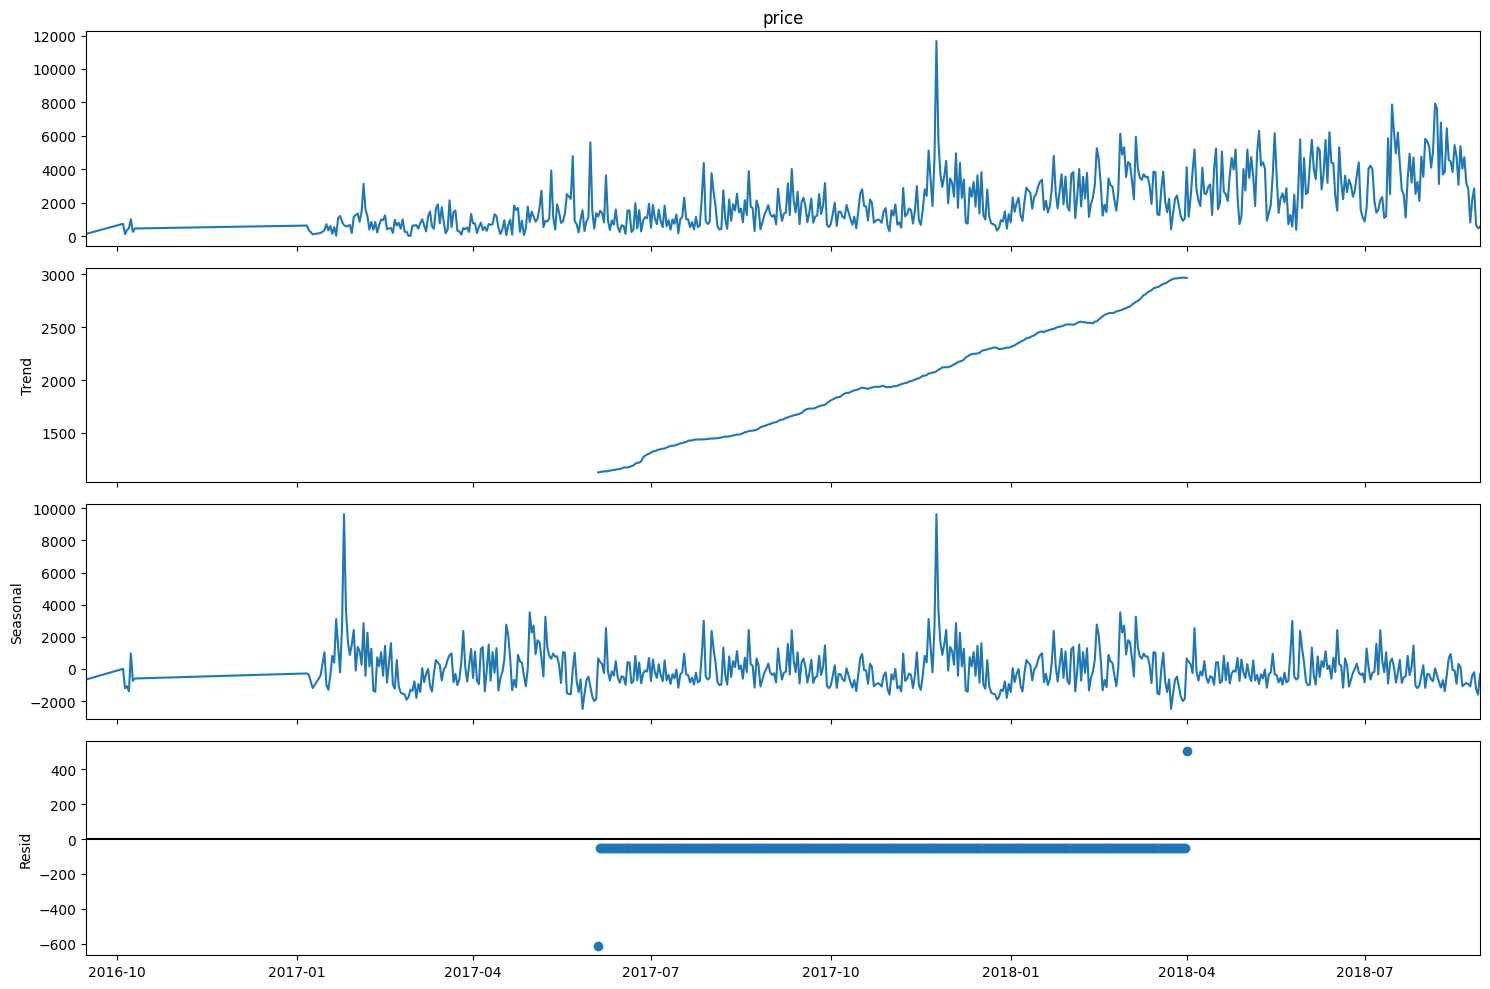

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose (dfHB.price, model='additive', period=301)
import matplotlib
matplotlib.rcParams['figure.figsize'] =[15,10]
result.plot()

In [13]:
import numpy as np

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [16]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput

In [17]:
dfHB =dfHB.asfreq('D') # Multi-step necesita un índice que especifique la frecuencia

Fechas train : 2016-09-15 00:00:00 --- 2018-04-29 00:00:00  (n=592)
Fechas test  : 2018-04-30 00:00:00 --- 2018-08-29 00:00:00  (n=122)


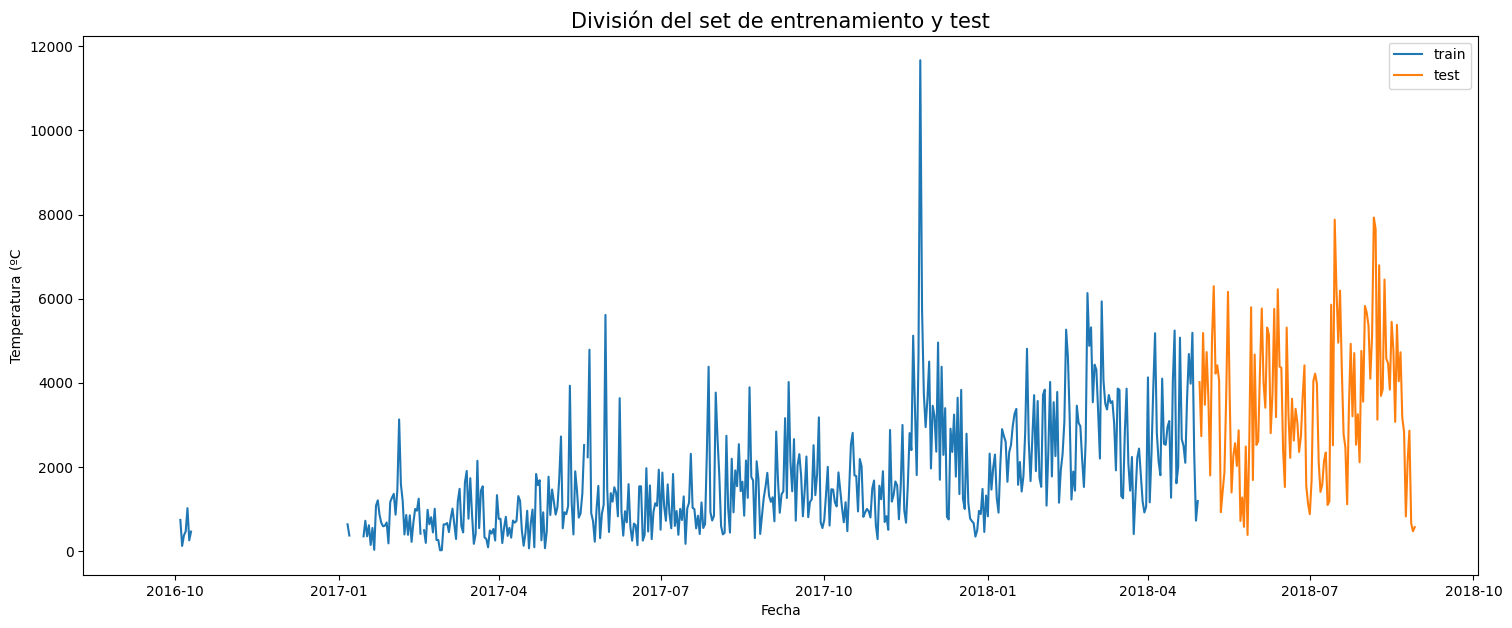

In [18]:
# Separación de datos en set de entrenamiento y testeo
# ==============================================================================

steps = 122 # Cantidad de dias que usaremos para testear
datos_train = dfHB[:-steps]
datos_test  = dfHB[-steps:]

print(f"Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

plt.subplots(figsize=(18, 7))
plt.plot(datos_train, label='train')
plt.plot(datos_test, label='test')
plt.xlabel('Fecha')
# plt.ylabel('Temperatura (ºC')
# plt.title('División del set de entrenamiento y test', fontsize = 15)
plt.legend()
plt.show()

In [ ]:
print(np.array(datos_train))


In [26]:
datos_train=np.nan_to_num(datos_train)

In [ ]:
print(datos_train)

In [27]:
datos_train=np.array(datos_train) if isinstance(datos_train,(list,np.ndarray)) else datos_train

In [ ]:
datos_train=np.squeeze(datos_train)
datos_train

In [50]:
# Fijamos, en lags, la ventana temporal que considerará el modelo para hacer sus predicciones

forecaster = ForecasterAutoreg(regressor = DecisionTreeRegressor(random_state=10), lags = 10)

forecaster.fit(y=datos_train)
forecaster

=======================ForecasterAutoreg=======================
Regressor: DecisionTreeRegressor(random_state=10)
Lags: [ 1  2  3  4  5  6  7  8  9 10]
Exogenous variable: False, None
Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 10, 'splitter': 'best'}

In [51]:
# Una vez entrenado el modelo, se predicen los datos de test (valor fijado en steps cuando separamos los datos en train/test)

# Predicciones
# ==============================================================================

predicciones = forecaster.predict(steps= steps)
predicciones

array([5263.31, 1307.1 , 1436.35, 1436.35, 3893.52, 1517.17, 1807.53,
        826.45, 3635.13, 1901.45, 1800.26,  598.52, 1001.16,  879.8 ,
       1057.25, 1436.35, 2356.39, 3066.  , 1263.86, 1782.51, 1456.37,
       3832.34, 1774.06, 1329.53, 2185.31, 3893.52, 2075.94, 2601.79,
       2257.27, 1574.76, 2548.55,  607.43, 2031.72, 1676.36, 3893.52,
       3261.66, 1646.66, 2671.88,  805.95, 2878.75, 3034.25, 1746.66,
       3706.18, 4620.41, 2661.24, 1268.7 , 2336.8 , 1268.7 , 3456.05,
       3979.77, 2257.27,  394.9 ,  751.31, 1189.35, 2001.63, 1436.35,
       1436.35, 3066.  , 1562.86, 1807.53, 1586.46,  898.67, 1572.08,
       1418.27, 2185.31, 3881.39,  813.58, 1918.36,  921.15, 2840.6 ,
       2526.57, 1329.53,  598.52,  736.97,  960.59, 1057.25, 1436.35,
       1676.36, 3066.  , 1261.33, 5121.15,  707.07, 2840.6 , 4100.23,
       1800.26, 1517.17, 1461.9 ,  755.57, 3635.13, 2247.45, 2257.27,
       1823.53,  898.67,  247.18, 2135.19, 1746.66, 1170.2 , 3066.  ,
       3893.52, 2128

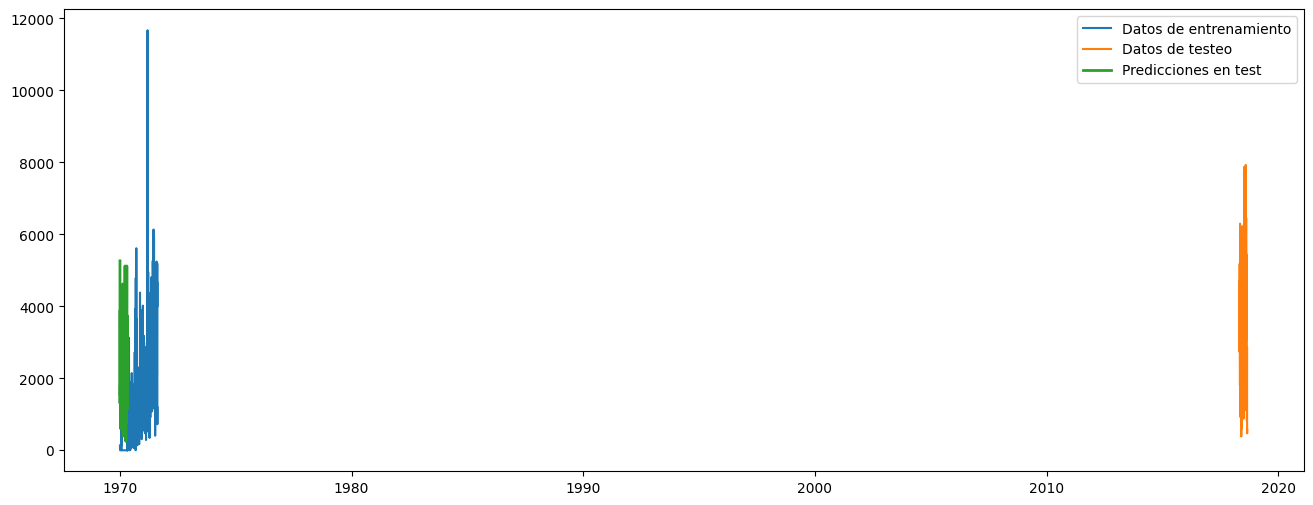

In [52]:
plt.subplots(figsize=(16, 6))
plt.plot(datos_train, label='Datos de entrenamiento',)
plt.plot(datos_test, label='Datos de testeo')
plt.plot(predicciones, label='Predicciones en test', lw= 2)
# plt.xlabel('Fecha')
# plt.ylabel('Temperatura (ºC)')
# plt.title('Multistep - recursivo', fontsize = 18)
plt.legend()
plt.show()

Prueba Metodo directo

In [54]:
forecaster = ForecasterAutoregMultiOutput(regressor = DecisionTreeRegressor(random_state=42),steps= steps, lags= 14)

forecaster.fit(y=datos_train)
forecaster

============================ForecasterAutoregMultiOutput============================
Regressor: DecisionTreeRegressor(random_state=42)
Steps: 122
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Exogenous variable: False, None
Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}

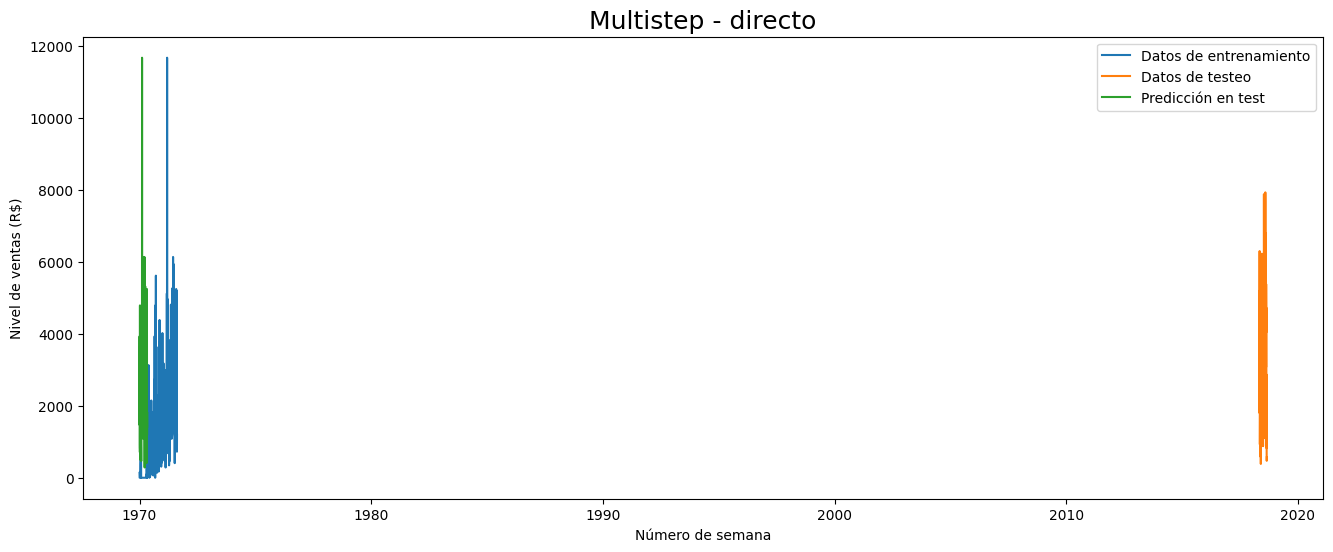

In [55]:
# Predecimos
# ==============================================================================
predicciones = forecaster.predict()

# Ploteamos
# ==============================================================================
plt.subplots(figsize=(16, 6))
plt.plot(datos_train, label='Datos de entrenamiento')
plt.plot(datos_test, label='Datos de testeo')
plt.plot(predicciones, label='Predicción en test')
plt.title('Multistep - directo', fontsize = 18)
plt.xlabel('Número de semana')
plt.ylabel('Nivel de ventas (R$)')
plt.legend()
plt.show()

trato con prophet

In [56]:
from prophet import Prophet

In [57]:
df2=pd.read_csv('/content/drive/MyDrive/Olist/Tablas/Tabla1FinalCorrejida.csv' , sep=';')

In [ ]:
df2=df2.drop(columns=['Estados','order_id','customer_id','order_item_id','product_id','seller_id','freight_value','customer_unique_id','customer_zip_code_prefix','customer_city'])


In [60]:
df2

,order_purchase_timestamp,price,product_category_name
0,2017-08-03 10:39:39,199.00,telephony
1,2017-05-13 13:16:20,16.90,NaN
2,2017-07-06 17:11:14,300.00,luggage_accessories
3,2017-12-23 16:45:12,239.00,electronics
4,2017-07-17 18:19:50,56.99,perfumery
...,...,...,...
110111,2017-02-28 12:39:01,120.99,sports_leisure
110112,2018-03-09 11:50:45,52.99,perfumery
110113,2018-01-18 11:52:59,145.99,auto
110114,2018-04-16 20:51:56,21.99,telephony


In [61]:
df2['order_purchase_timestamp']=pd.to_datetime(df2['order_purchase_timestamp'])

In [62]:
df2['fecha']= df2['order_purchase_timestamp'].dt.date

In [63]:
df2=df2[df2['product_category_name']=='health_beauty']

In [64]:
df2['fecha']=pd.to_datetime(df2['fecha'])
df2=df2.groupby('fecha')['price'].sum().reset_index()

<ipython-input-64-76e73363baa6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fecha']=pd.to_datetime(df2['fecha'])


In [65]:
df2

,fecha,price
0,2016-09-15,134.97
1,2016-10-04,741.10
2,2016-10-05,121.84
3,2016-10-06,370.67
4,2016-10-07,467.66
...,...,...
597,2018-08-25,2138.15
598,2018-08-26,2863.32
599,2018-08-27,661.50
600,2018-08-28,469.80


In [66]:
df2.reset_index(level=0,inplace=True)
df2.rename(columns= {'fecha': 'ds', 'price' : 'y'}, inplace = True)

In [67]:
data=df2

In [68]:
# Instanciamos un modelo de Prophet

prophet = Prophet(yearly_seasonality= True, uncertainty_samples = 50, mcmc_samples=50, interval_width= 0.6)

# Entrenamos el modelo
prophet.fit(data)

# Construimos un dataframe con los x valores futuros que querámos predecir. En este caso, 4 años.
build_forecast = prophet.make_future_dataframe(periods=(4*52), freq='W') #

# Predecimos
forecast = prophet.predict(build_forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp226m9o89/ghz49oml.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp226m9o89/slzqvfjw.json
21:44:15 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=44834', 'data', 'file=/tmp/tmp226m9o89/ghz49oml.json', 'init=/tmp/tmp226m9o89/slzqvfjw.json', 'output', 'file=/tmp/tmp226m9o89/prophet_modelulmahdx3/prophet_model-20231205214415_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=44834', 'data', 'file=/tmp/tmp226m9o89/ghz49oml.json', 'init=/tmp/tmp226m9o89/slzqvfjw.json', 'output', 'file=/tmp/tmp226m9o89/prophet_modelulmahdx3/prophet_model-20231205214415_2.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

21:44:17 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=44834', 'data', 'file=/tmp/tmp226m9o89/ghz49oml.json', 'init=/tmp/tmp226m9o89/slzqvfjw.json', 'output', 'file=/tmp/tmp226m9o89/prophet_modelulmahdx3/prophet_model-20231205214415_1.csv', 'method=sample', 'num_samples=25', 'num_warmup=25', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp226m9o89/prophet_modelulmahdx3/prophet_model-20231205214415_1.csv
 console_msgs (if any):
	/tmp/tmp226m9o89/prophet_modelulmahdx3/prophet_model-20231205214415_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 25
    num_warmup = 25
    save_warmup = 0 (Default)
    thin = 1 (Default)


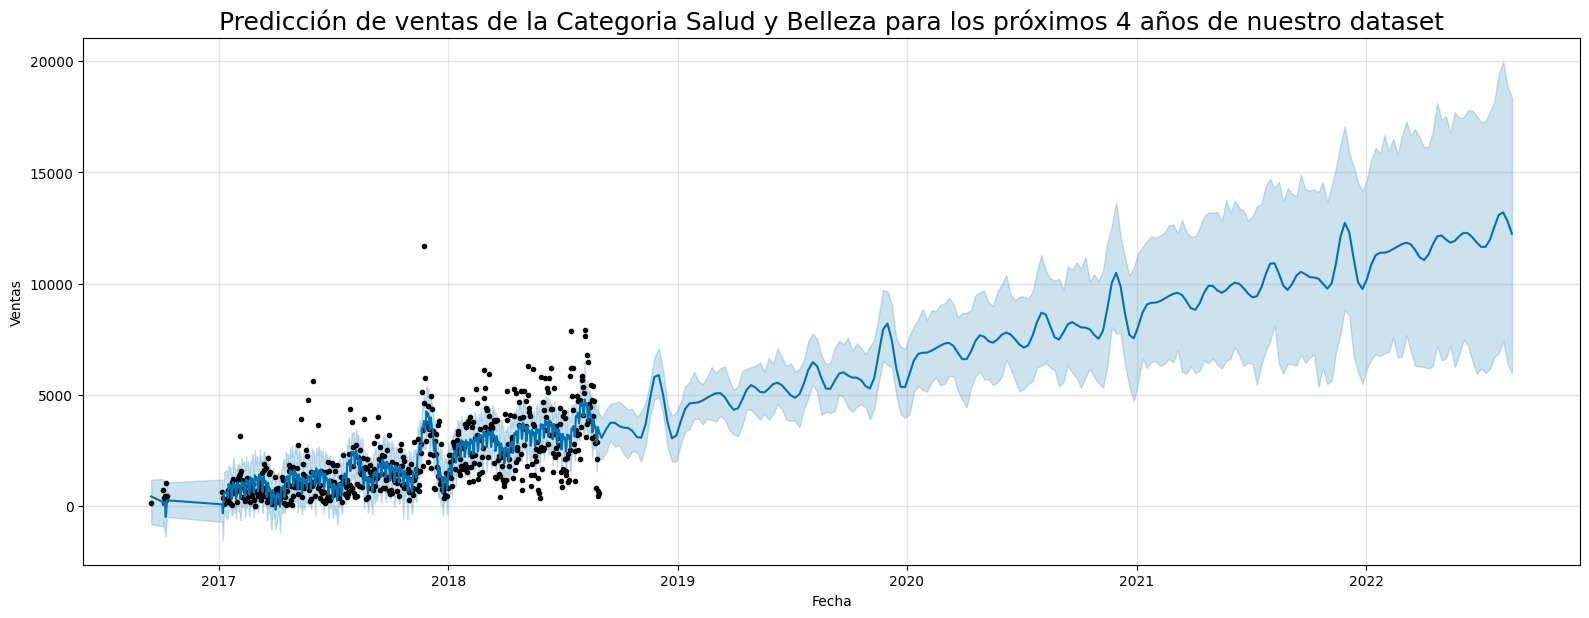

In [70]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Ventas', figsize = (16,6))
plt.title('Predicción de ventas de la Categoria Salud y Belleza para los próximos 4 años de nuestro dataset', fontsize = 18)
plt.show()